# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we see that there is no null value in the dataset

In [5]:
df.shape

(7043, 21)

# Exploratory Data Analysis(EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes.index

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]


In [12]:
len(categorical_columns)

18

In [13]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
[2, 5, 18]


In [14]:
len(numerical_columns)

3

we have only 3 numerical columns out of 21 columns.

# Univariate Analysis

column Name: customerID


7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


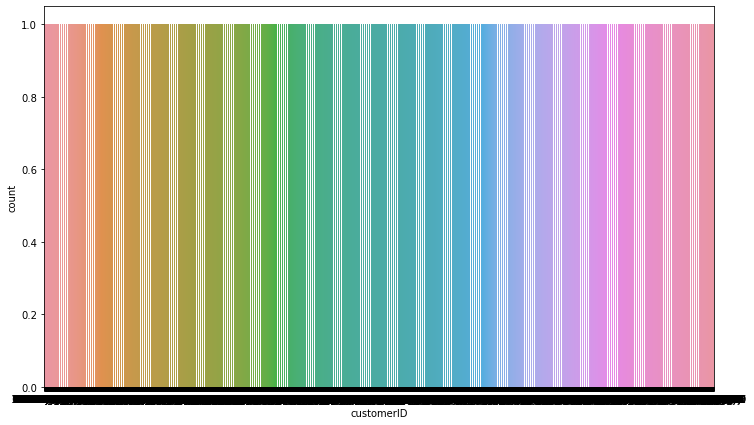



####################################################################################################


In [20]:
i=0 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

customer id is the unique id of each customer.so,we drop this column

In [24]:
#append "customerID" column in drop_columns list
drop_columns=[]
drop_columns.append("customerID")

column Name: gender


Male      3555
Female    3488
Name: gender, dtype: int64
len= 2


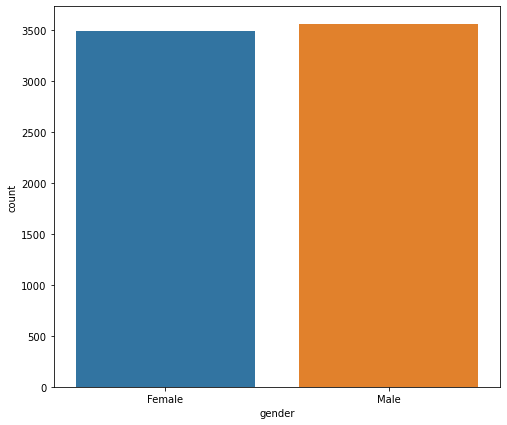

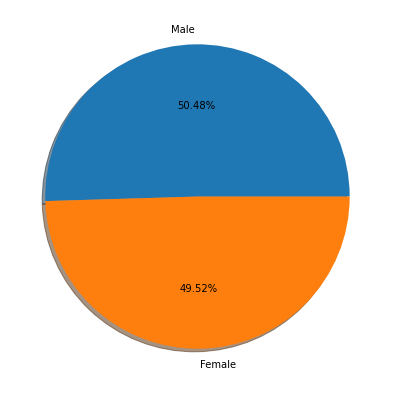



###############################################################################################################################


In [29]:
i=1 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,7))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

we can see that the number of male customer nearly equal to the number of female customer.

column Name: Partner


No     3641
Yes    3402
Name: Partner, dtype: int64
len= 2


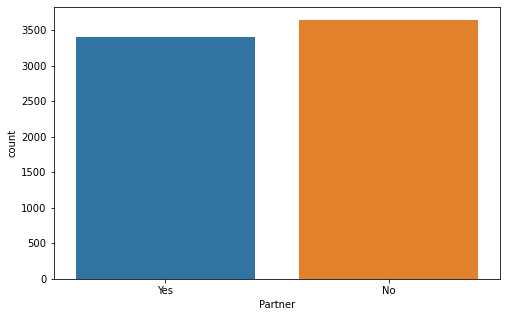

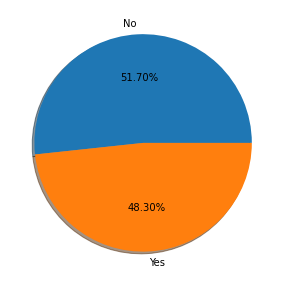



###############################################################################################################################


In [36]:
i=3 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

column Name: Dependents


No     4933
Yes    2110
Name: Dependents, dtype: int64
len= 2


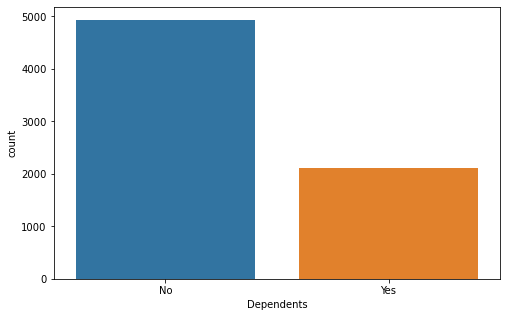

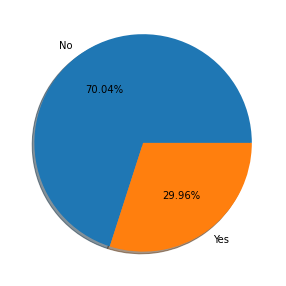



###############################################################################################################################


In [43]:
i=4 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Most of the customer is independeant

column Name: PhoneService


Yes    6361
No      682
Name: PhoneService, dtype: int64
len= 2


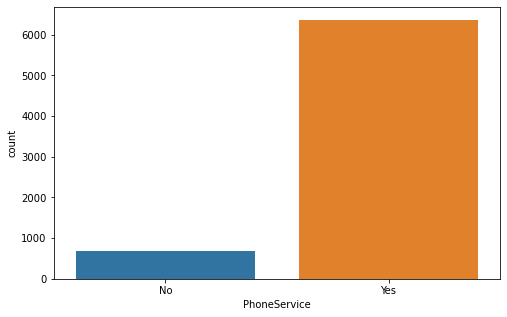

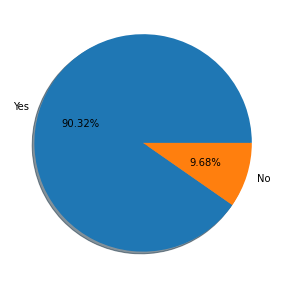



###############################################################################################################################


In [51]:
i=6 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Maximum customer using the phone service

column Name: MultipleLines


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
len= 3


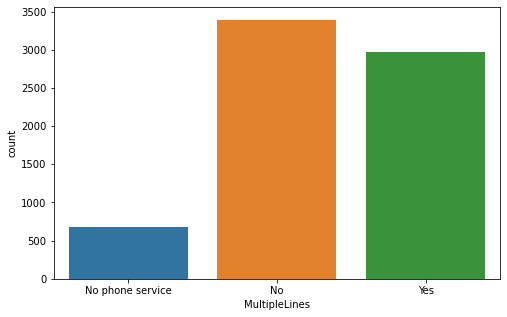

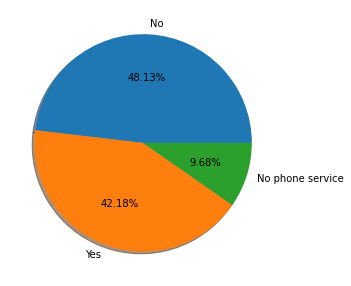



###############################################################################################################################


In [59]:
i=7 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Maximum customer do not use Multiple Lines

-we can see that phoneservice data include in Multiple Line column.

-so,we drop Multipleline column.

column Name: InternetService


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
len= 3


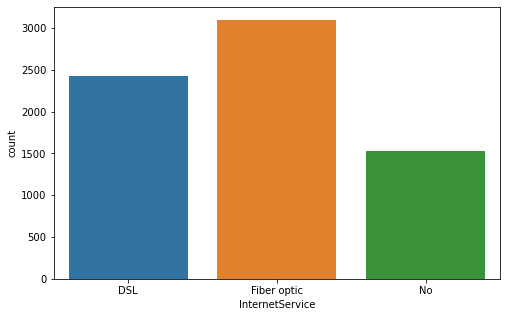

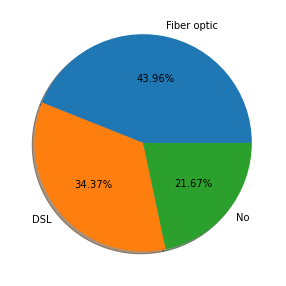



###############################################################################################################################


In [66]:
i=8 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)


There are two types of Internet Service

1.Fiber Optic

2.DSL

macimum people who using internet uses Fiber Optic internet service

column Name: OnlineSecurity


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
len= 3


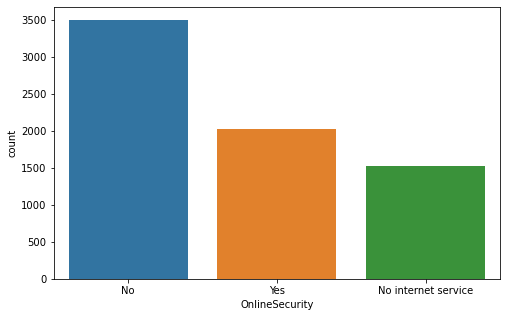

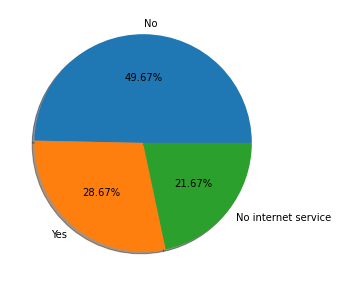



###############################################################################################################################


In [74]:
i=9 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Maximum people do not use Online Security.

column Name: OnlineBackup


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
len= 3


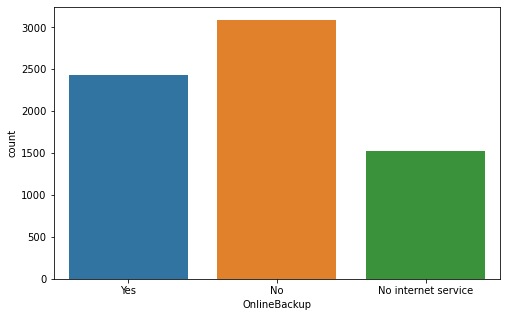

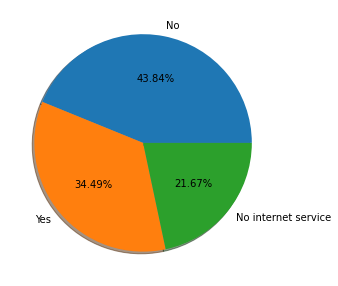



###############################################################################################################################


In [84]:
i=10 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)


There are three optiion for online backup but the maximum customer do not use online backup.

column Name: DeviceProtection


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
len= 3


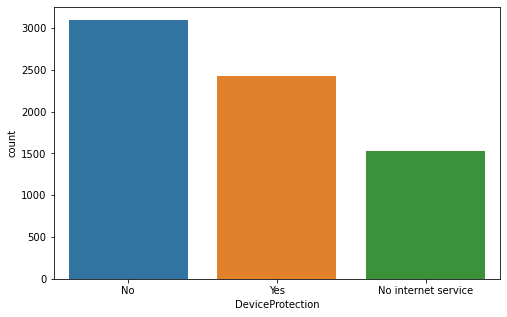

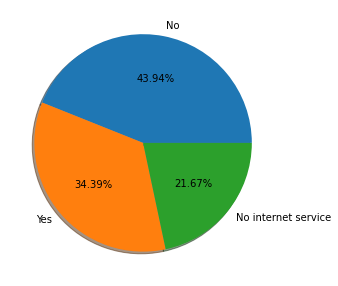



###############################################################################################################################


In [92]:
i=11 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

They have Device protection service but only 35% customer use this.

column Name: TechSupport


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
len= 3


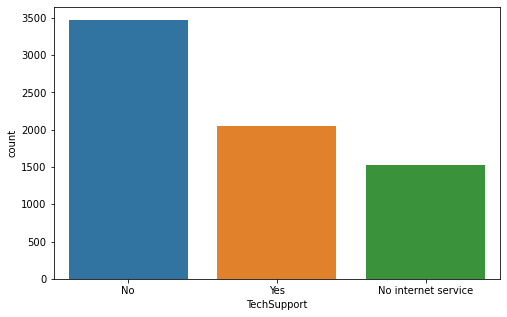

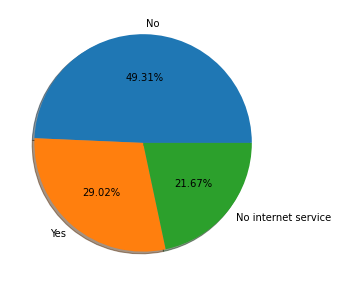



###############################################################################################################################


In [94]:
i=12 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

They have Tech support service but 50% customer do not use this service.
only 30% prople use tis service

column Name: StreamingTV


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
len= 3


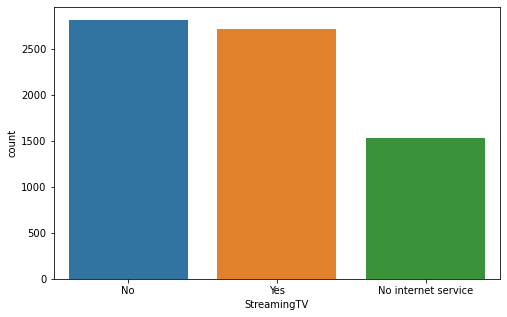

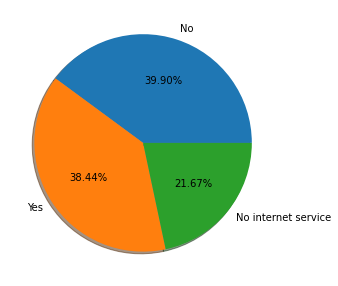



###############################################################################################################################


In [96]:
i=13 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Company has streaming TV option

60% people do not use this

only 40% people use this

column Name: StreamingMovies


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
len= 3


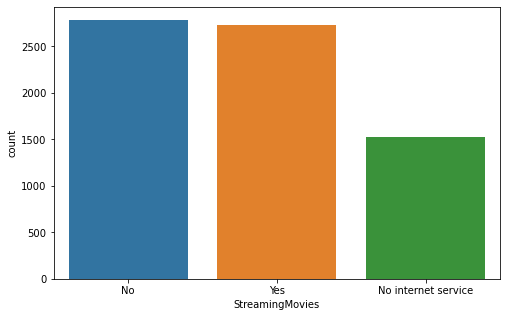

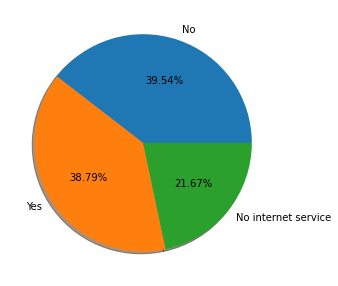



###############################################################################################################################


In [100]:
i=14 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

only 40% customers are using streaming movies option

column Name: Contract


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
len= 3


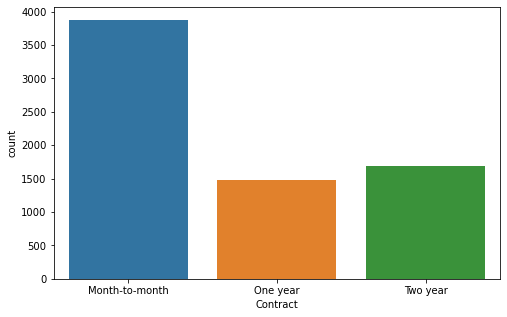

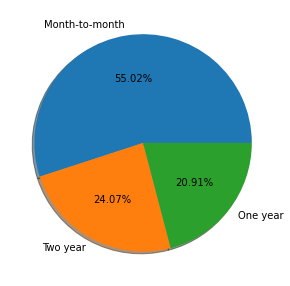



###############################################################################################################################


In [103]:
i=15 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

55% customer use month to month contruct option

20% people use one year contruct option

24% people use two year contruct option

column Name: PaperlessBilling


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
len= 2


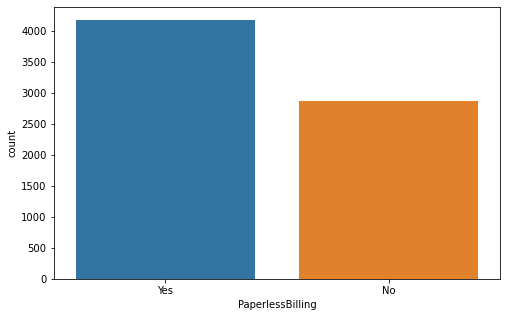

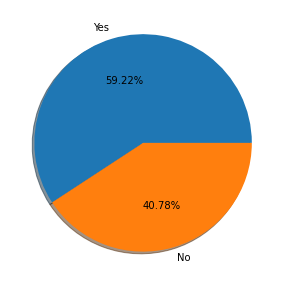



###############################################################################################################################


In [105]:
i=16 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

60% customer use paperless billing and 40% people do not use paperless

column Name: PaymentMethod


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
len= 4


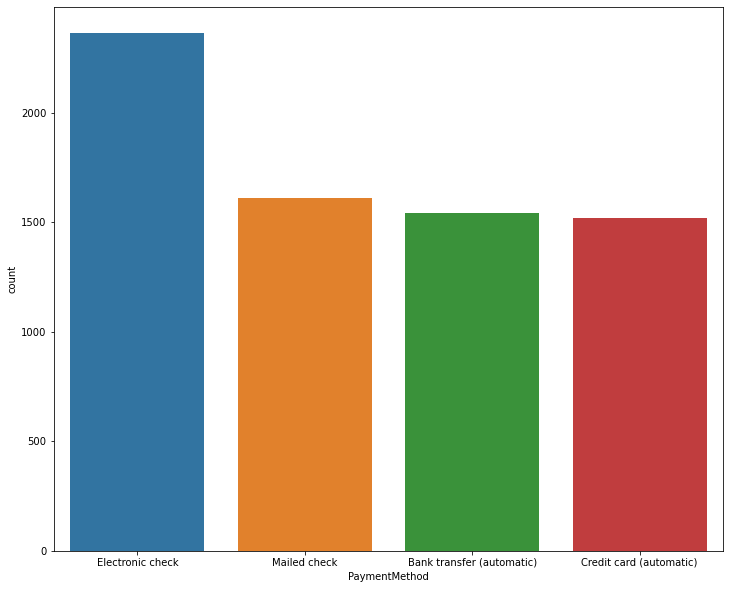

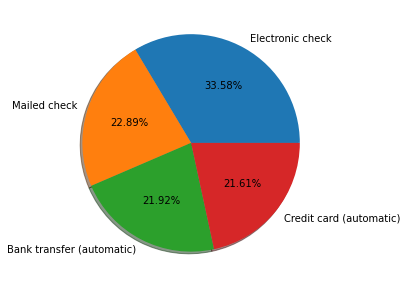



###############################################################################################################################


In [108]:
i=17 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,10))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

34% people use electronic check to make payment

23% people use mailed check to make payment

22% people use bank transfer to make payment

22% people use credit card to make payment

column Name: TotalCharges


          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


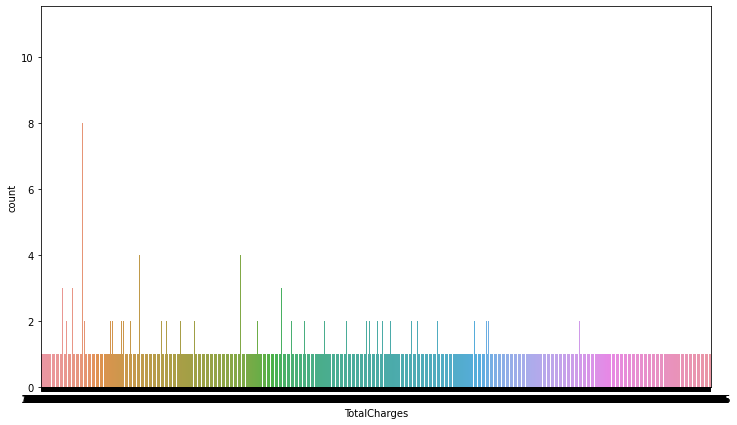



####################################################################################################


In [114]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we can see that some space value present in the column
so,we convert this space value into NaN value

In [115]:
# checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Some space are presents in the dataset, convert them into NaN

In [116]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [118]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

converting the object data type into float data type

In [119]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

column Name: TotalCharges


20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64


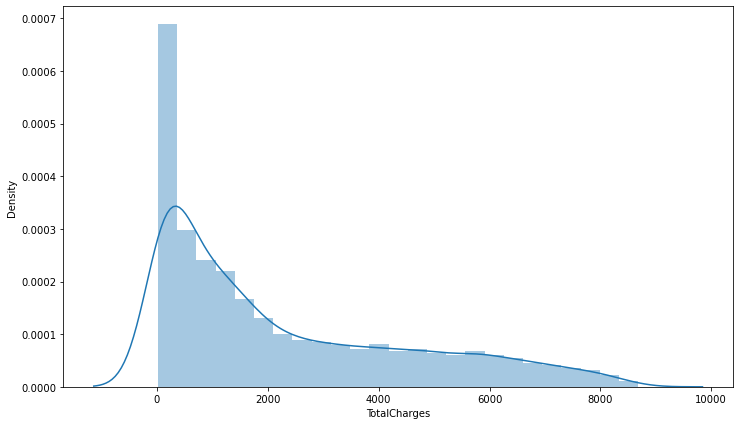



####################################################################################################


In [121]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

skewness present in data

column Name: Churn


No     5174
Yes    1869
Name: Churn, dtype: int64
len= 2


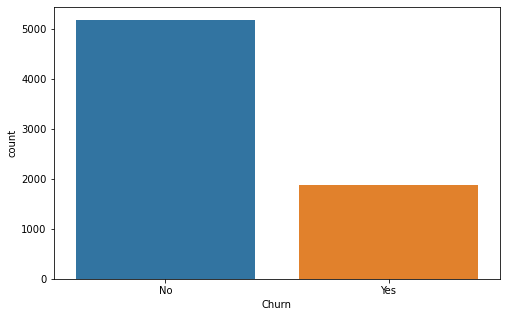

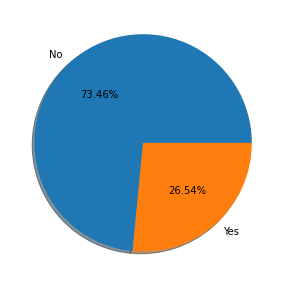



###############################################################################################################################


In [124]:
i=20 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

73% customer's churn is no

26% customer's churn is yes

This is our target column.we have to predict this.
clearly we can see that the class is imbalamced.we will balance it later on.

Numerical Column:

column Name: SeniorCitizen


0    5901
1    1142
Name: SeniorCitizen, dtype: int64
len= 2


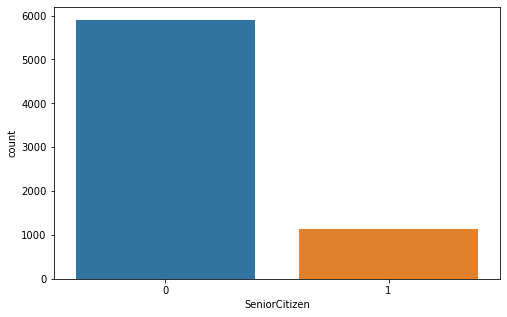

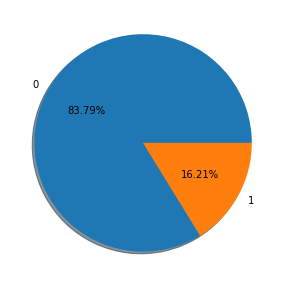



###############################################################################################################################


In [127]:
i=2 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

column Name: tenure


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


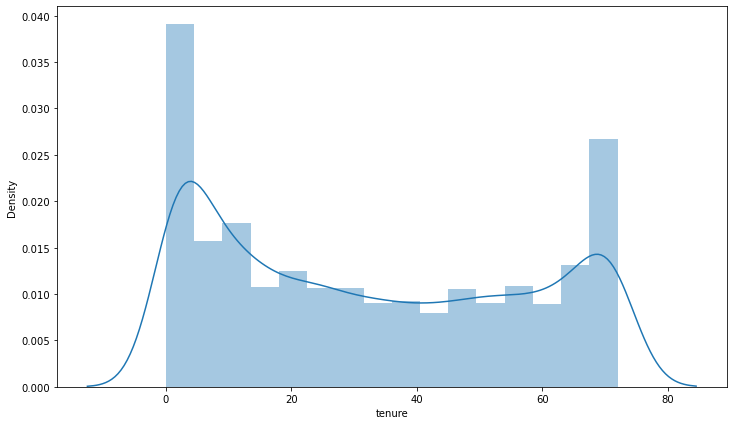



####################################################################################################


In [129]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

 skewness present in the data.

column Name: MonthlyCharges


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


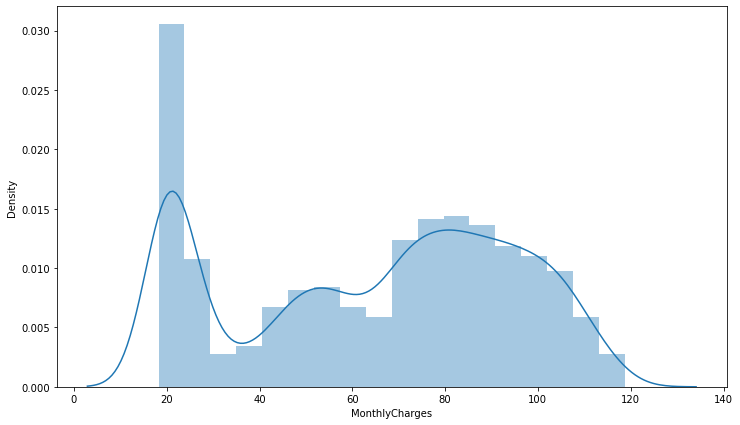



####################################################################################################


In [132]:
i=18 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

skewness present in the data

# Bivariate Analysis

comparing tenure and TotalCharges

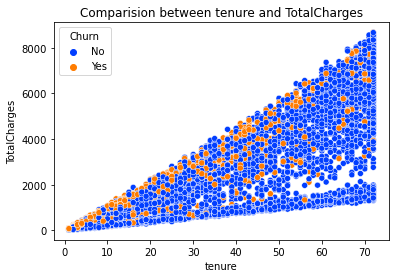

In [136]:
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot(x="tenure",y="TotalCharges",data=df,hue="Churn",palette="bright")
plt.show()

checking Churn level in Contract

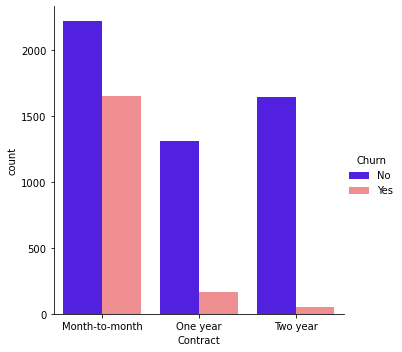

In [137]:
sns.catplot(x="Contract",hue='Churn',data=df,palette="gnuplot2",kind="count")
plt.show()

checking Churn level in PaperlessBilling

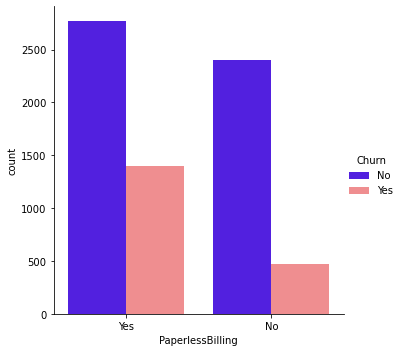

In [138]:
sns.catplot(x="PaperlessBilling",hue='Churn',data=df,palette="gnuplot2",kind="count")
plt.show()

The customer who have churnrd are mostly using paperless billing

checking Churn level in PaymentMethod

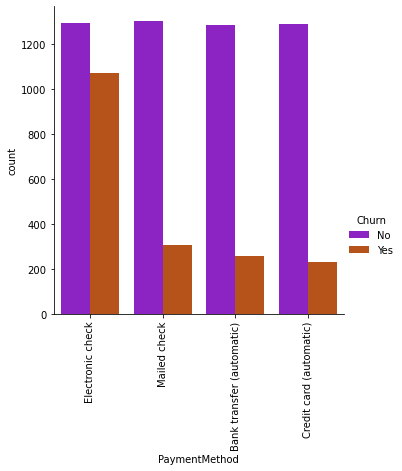

In [141]:
sns.catplot(x="PaymentMethod",hue='Churn',data=df,palette="gnuplot",kind="count")
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate.

checking Churn level and gender

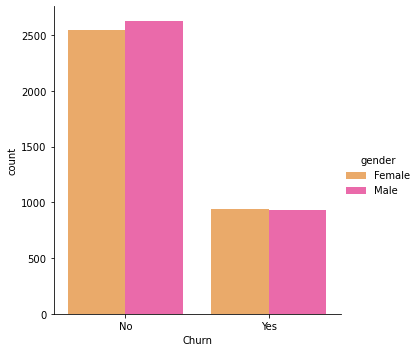

In [143]:
sns.catplot(x="Churn",hue='gender',data=df,kind="count",palette="spring_r")

we can see there is no significance difference in the genders, both the genders have mostly equal churn level

checking Churn level and Partner

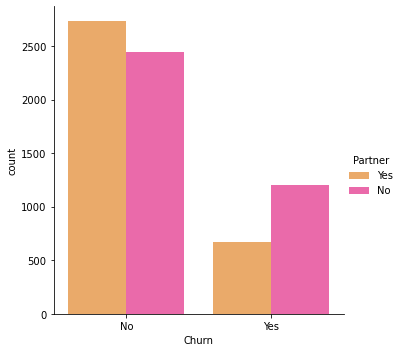

In [144]:
sns.catplot(x='Churn',hue='Partner',data=df,palette="spring_r",kind='count')

we see that the customer without partners have high churn rate comapare to customer with partner

checking Churn level and Dependents

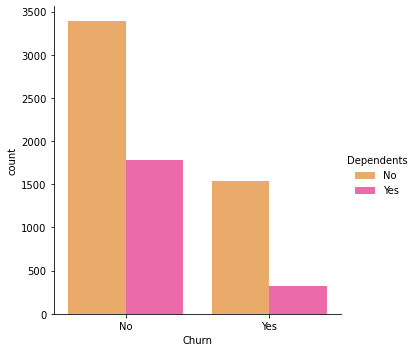

In [148]:
sns.catplot(x='Churn',hue='Dependents',data=df,palette="spring_r",kind='count')

The independent customer have high churn rate compare to dependent customer.



 checking Churn level and PhoneService

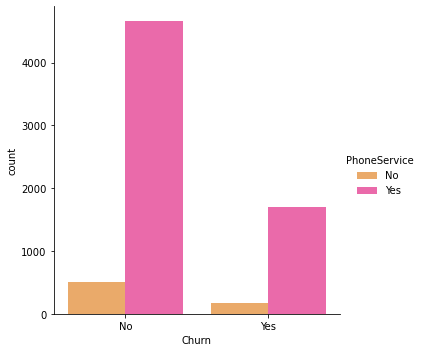

In [151]:
sns.catplot(x="Churn",hue='PhoneService',data=df,palette="spring_r",kind="count")
plt.show()

we can notice the customers who have phone service have high tendency of getting churned

checking Churn level and Multiplelines

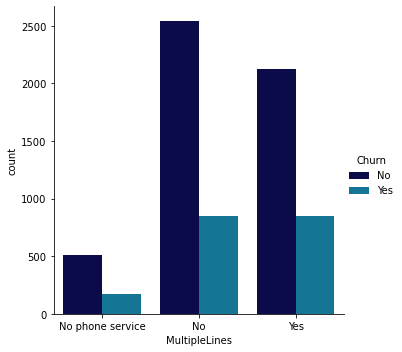

In [152]:
sns.catplot(x="MultipleLines",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services

checking Churn level in InternetService

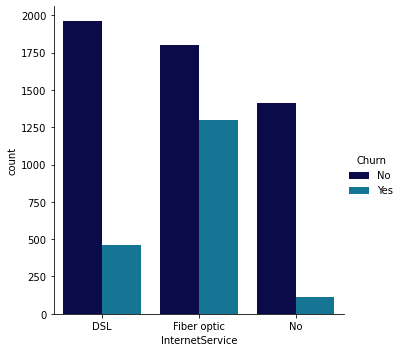

In [155]:
sns.catplot(x="InternetService",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

checking Churn level in OnlineSecurity

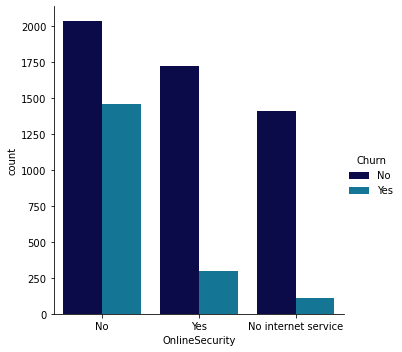

In [158]:
sns.catplot(x="OnlineSecurity",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned

checking Churn level in OnlineBackup

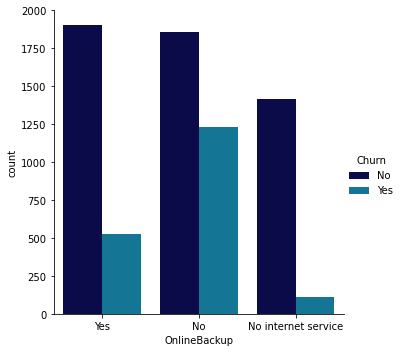

In [160]:
sns.catplot(x="OnlineBackup",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup.

The customers who do not have online backup services they have high churn rate.

checking Churn level in DeviceProtection

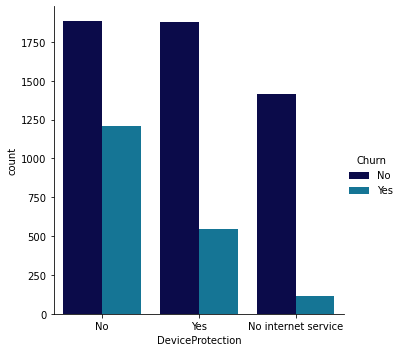

In [162]:
sns.catplot(x="DeviceProtection",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others

checking Churn level in TechSupport

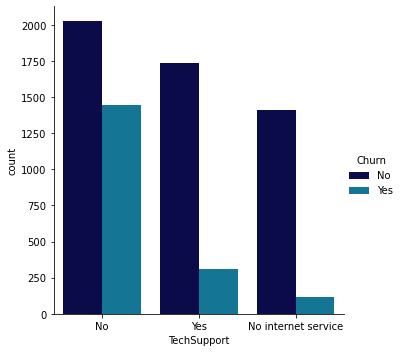

In [165]:
sns.catplot(x="TechSupport",hue='Churn',data=df,palette="ocean",kind="count")

Here we can clearly see that the customers who do not have any techsupport then they have high churn ration

checking Churn level in StreamingTV

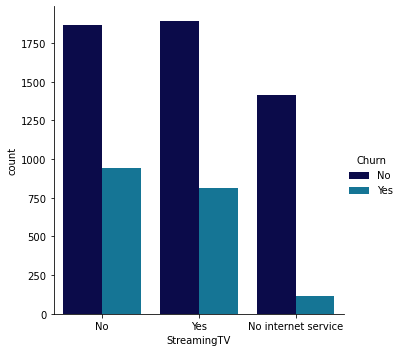

In [168]:
sns.catplot(x="StreamingTV",hue='Churn',data=df,palette="ocean",kind="count")

The churn rate is nearly same if the customer own StreamingTV or not.

checking Churn level in StreamingMovies

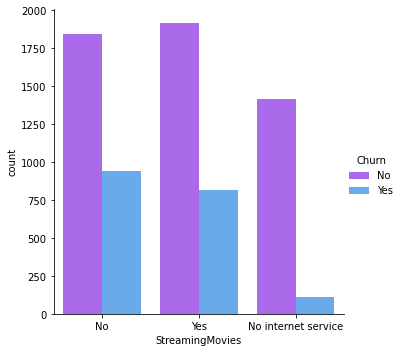

In [174]:
sns.catplot(x="StreamingMovies",hue='Churn',data=df,palette="cool_r",kind="count")
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

checking Churn level in Contract

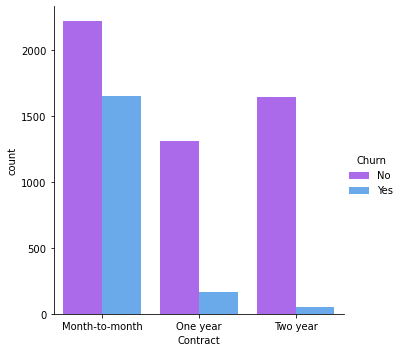

In [179]:
sns.catplot(x="Contract",hue='Churn',data=df,palette="cool_r",kind="count")
plt.show()

The customer who have churend are mostely having month to month contract

checking Churn level in PaperlessBilling

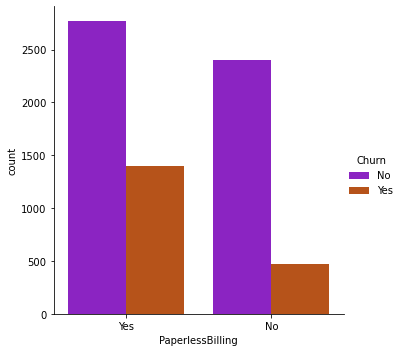

In [184]:
sns.catplot(x="PaperlessBilling",hue='Churn',data=df,palette="gnuplot",kind="count")
plt.show()

The customers who prefer paperless billing they have high churn rate.

checking Churn level in PaymentMethod

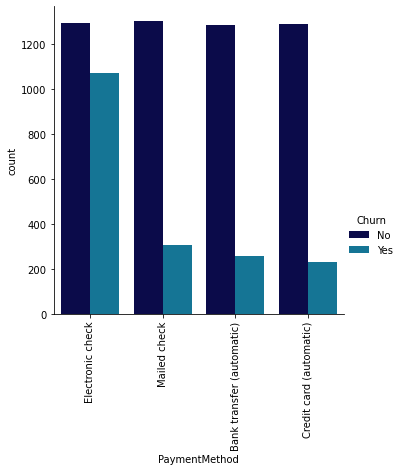

In [187]:
sns.catplot(x="PaymentMethod",hue='Churn',data=df,palette="ocean",kind="count")
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

# Multivariate Analysis

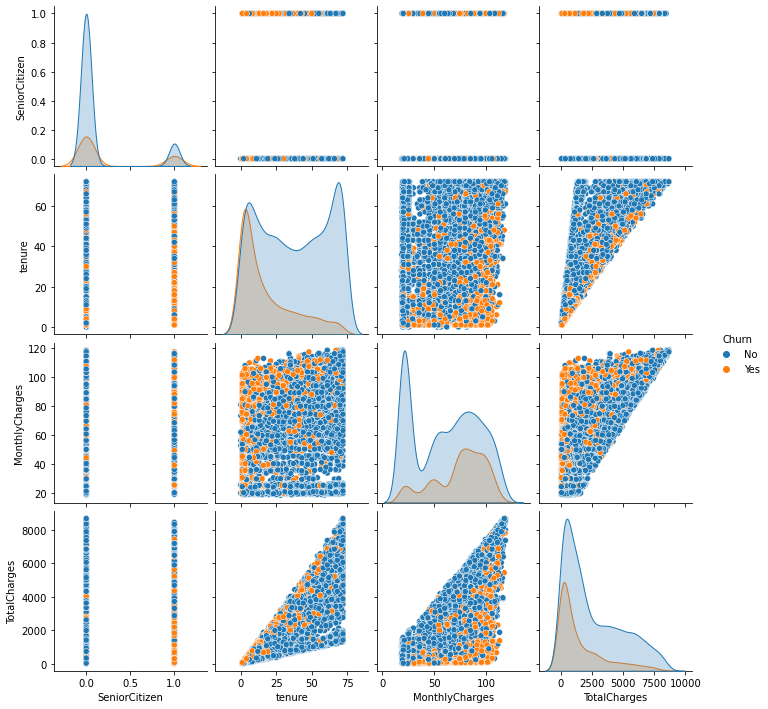

In [188]:
sns.pairplot(df,hue='Churn')

The pairplot gives the pairwise relation between the features on the basis of the target "Churn" On the diagonal we can notice the distribution plots.

we have only three numeric type columns others are categorical type.

We do not see any pairs that have a linear relationship.

The curve of senior citizen column likes a normal distribution curve.

positive skewness present in Monthly charges column.

since we have only two numerival columns,we do not remove any column by checking VIF score.
we only remove outliers.

# Checking Outliers

column Name: tenure


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


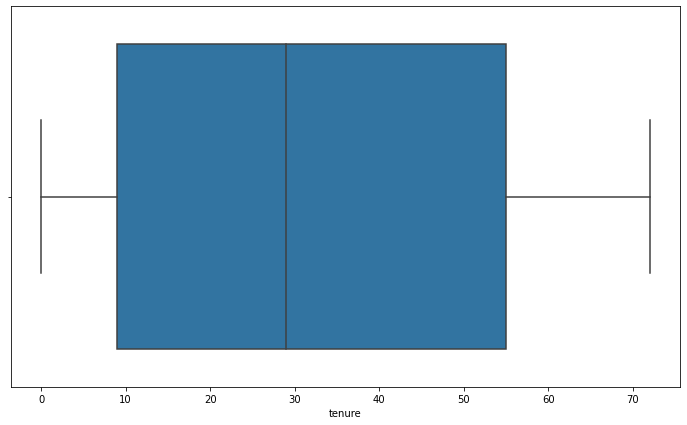



####################################################################################################


In [191]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.boxplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: MonthlyCharges


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


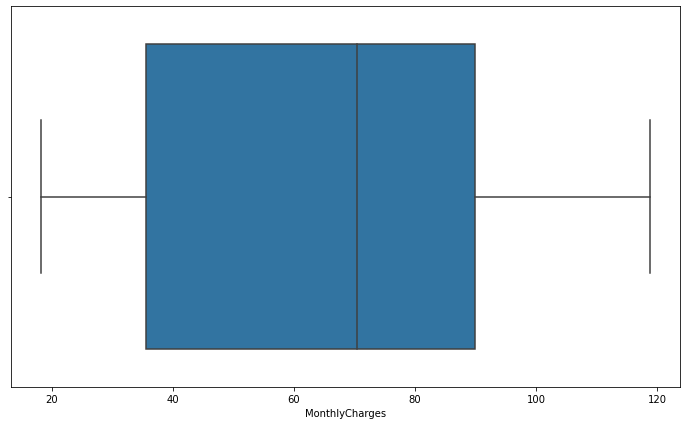



####################################################################################################


In [192]:
i=18 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.boxplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: TotalCharges


20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64


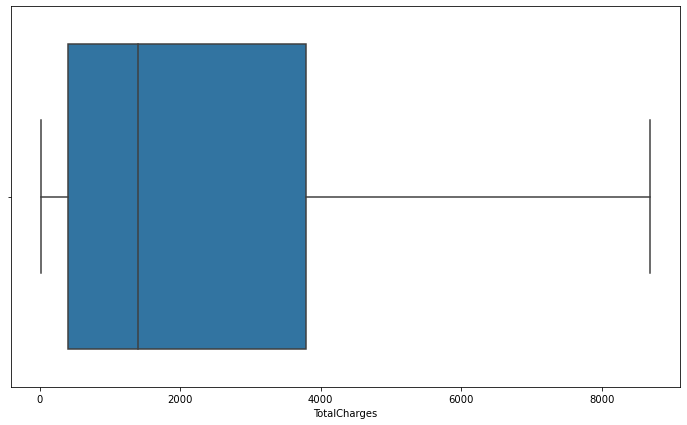



####################################################################################################


In [193]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.boxplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we have no outliers in the dataset.

NOW Droping that column which i have stored in drop_column list.

In [198]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Outliers Checking using zscore


In [202]:
from scipy.stats import zscore

In [203]:
outliers_column=df[["tenure","TotalCharges","MonthlyCharges"]]

In [204]:
z=np.abs(zscore(outliers_column))
z

,tenure,TotalCharges,MonthlyCharges
0,1.277445,NaN,1.160323
1,0.066327,NaN,0.259629
2,1.236724,NaN,0.362660
3,0.514251,NaN,0.746535
4,1.236724,NaN,0.197365
...,...,...,...
7038,0.340876,NaN,0.665992
7039,1.613701,NaN,1.277533
7040,0.870241,NaN,1.168632
7041,1.155283,NaN,0.320338


In [205]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


we have no outliers

checking skewness

In [206]:
outliers_column.skew()

tenure            0.239540
TotalCharges      0.961642
MonthlyCharges   -0.220524
dtype: float64

some skewness present in the "TotalCharges" column.we will handle it later on.

In [207]:
outliers_column.describe()

,tenure,TotalCharges,MonthlyCharges
count,7043.000000,7032.000000,7043.000000
mean,32.371149,2283.300441,64.761692
std,24.559481,2266.771362,30.090047
min,0.000000,18.800000,18.250000
25%,9.000000,401.450000,35.500000
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.850000
max,72.000000,8684.800000,118.750000


we can see that:-
difference between mean and 50th percentile of TotalCharges Column is high.It means that skewness present in the TotalCharges Column.
difference between 75th percentile and max of the each column is very less.It means that no outliers present in this columns.

# Filling Missing Value

In [208]:
df["TotalCharges"]=df["TotalCharges"].replace(np.nan,df["TotalCharges"].mean())

In [209]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value in the dataset.we move to the next step label encoding.

# LabelEncoding

In [210]:
df.nunique().to_frame('unique values')

,unique values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [211]:
df.shape

(7043, 20)

In [212]:
from sklearn.preprocessing import LabelEncoder

In [219]:
le=LabelEncoder()
for i in range(20):
    if df[df.columns[i]].nunique()<=4:
        df[df.columns[i]]=le.fit_transform(df[df.columns[i]]).astype(float)

In [220]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0.0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0.0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1.0,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


checking correlation

In [222]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


correlation with target column is not good for each columns

# Dividing data in features and label

In [223]:
x=df.drop("Churn",axis=1) #Independent variable
y=df.iloc[:,-1] #Dependent variable

In [224]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50
7039,0.0,0.0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90
7040,0.0,0.0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45
7041,1.0,1.0,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60


In [225]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

# Oversampling

In [228]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [229]:
x,y=smt.fit_resample(x,y)

In [230]:
x.value_counts()

gender  SeniorCitizen  Partner   Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0.0     0.000000       0.000000  0.000000    1       1.0           0.000000       2.0              1.00000         1.000000      1.000000          1.00000      1.0          1.000000         0.0       0.000000          3.00000        20.900000       20.900000       5
                                                                                  1.0              0.00000         0.000000      0.000000          0.00000      0.0          0.000000         0.0       1.000000          2.00000        69.200000       69.200000       4
                                                                                                                                                                                                            

In [231]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

# Transforming data to remove skewness

In [232]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.06776416e+00, -5.53112006e-01,  1.14069481e+00, ...,
         3.48155608e-01, -1.33268855e+00, -1.74266515e+00],
       [ 1.03771337e+00, -5.53112006e-01, -9.52573781e-01, ...,
         1.43984162e+00, -4.48991257e-01,  3.91707268e-01],
       [ 1.03771337e+00, -5.53112006e-01, -9.52573781e-01, ...,
         1.43984162e+00, -5.55716240e-01, -1.26692743e+00],
       ...,
       [ 1.03771337e+00, -5.53112006e-01, -9.52573781e-01, ...,
         9.21599674e-04, -8.54698304e-01, -5.79985751e-01],
       [-2.00805037e-01, -5.53112006e-01,  7.95003096e-02, ...,
         3.48155608e-01,  5.31804262e-01,  7.71041877e-01],
       [-4.71651366e-01, -5.53112006e-01, -2.12382759e-01, ...,
        -1.28389343e-01, -1.27059021e+00, -1.16353449e+00]])

In [233]:
df_new1=pd.DataFrame(x)
df_new1.skew()

0    -0.035605
1     1.292964
2     0.167485
3     0.946661
4    -0.163128
5    -2.671901
6    -0.042903
7    -0.075786
8     0.360354
9     0.117278
10    0.108330
11    0.338750
12   -0.070771
13   -0.070050
14    0.648780
15   -0.575070
16   -0.208294
17   -0.308021
18   -0.125866
dtype: float64

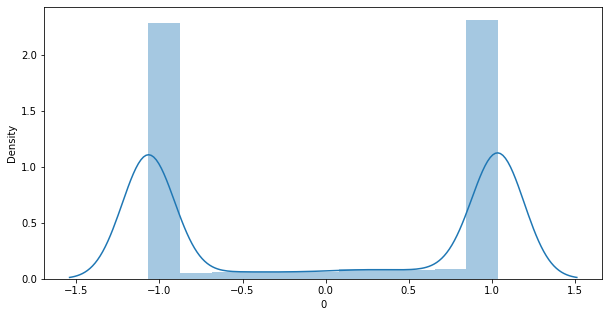

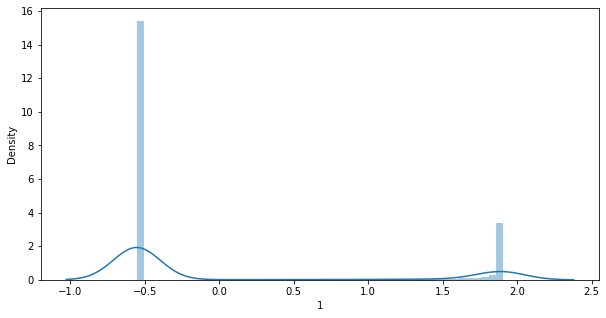

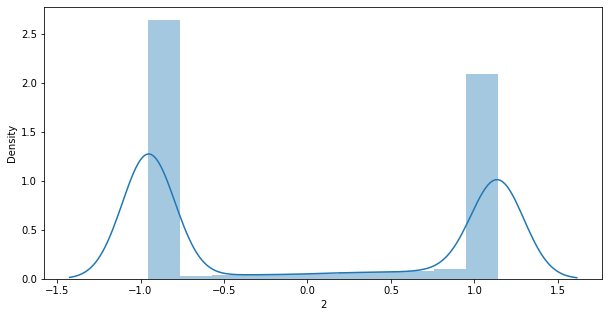

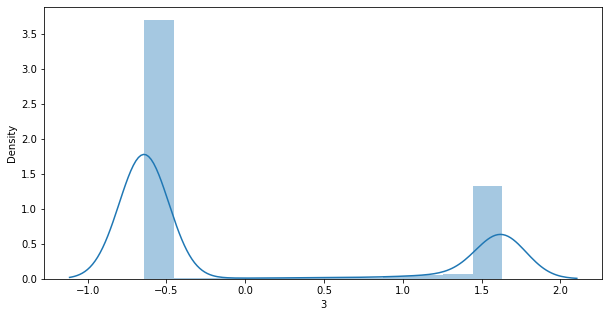

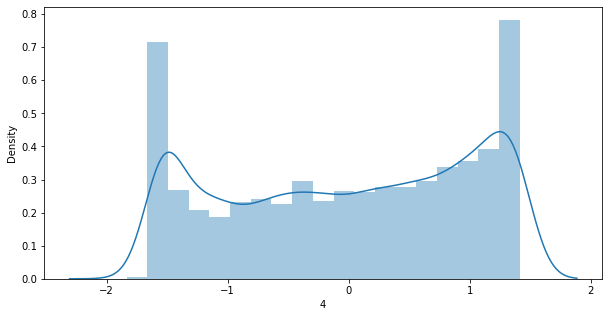

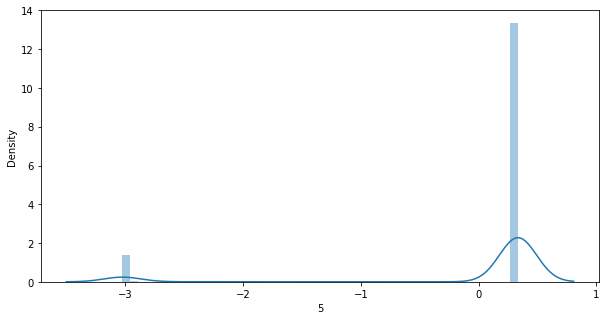

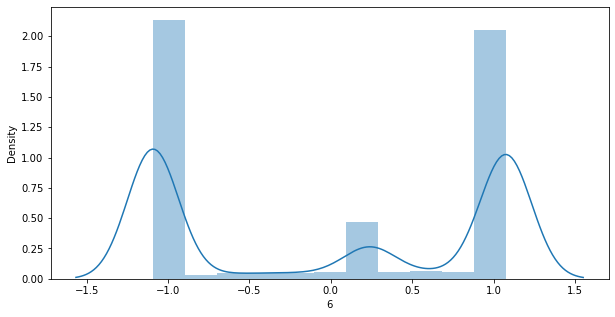

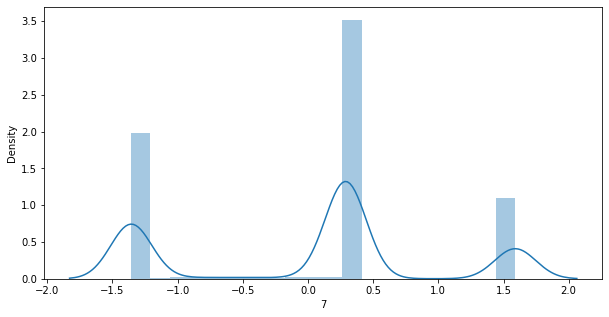

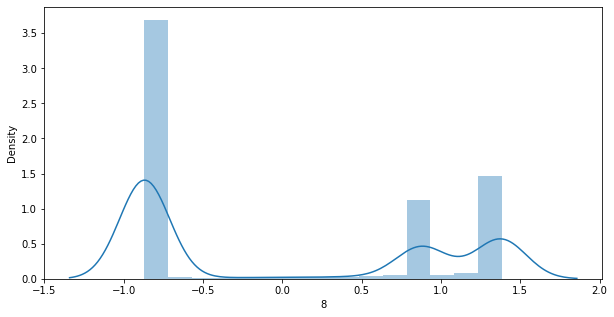

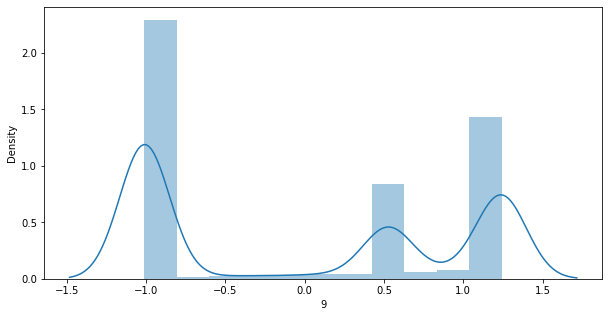

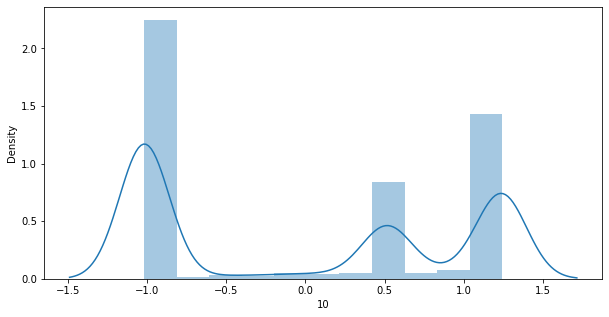

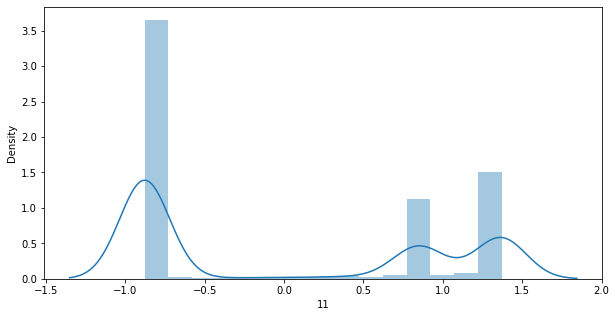

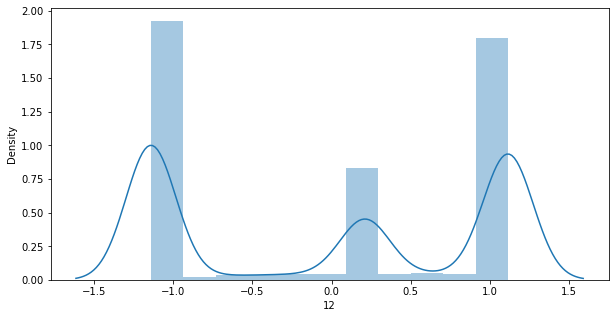

In [234]:
for i in range(13):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])
    plt.show()

Now skewness is under control

# Standard Scalar

In [235]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.06776416e+00, -5.53112006e-01,  1.14069481e+00, ...,
         3.48155608e-01, -1.33268855e+00, -1.74266515e+00],
       [ 1.03771337e+00, -5.53112006e-01, -9.52573781e-01, ...,
         1.43984162e+00, -4.48991257e-01,  3.91707268e-01],
       [ 1.03771337e+00, -5.53112006e-01, -9.52573781e-01, ...,
         1.43984162e+00, -5.55716240e-01, -1.26692743e+00],
       ...,
       [ 1.03771337e+00, -5.53112006e-01, -9.52573781e-01, ...,
         9.21599674e-04, -8.54698304e-01, -5.79985751e-01],
       [-2.00805037e-01, -5.53112006e-01,  7.95003096e-02, ...,
         3.48155608e-01,  5.31804262e-01,  7.71041877e-01],
       [-4.71651366e-01, -5.53112006e-01, -2.12382759e-01, ...,
        -1.28389343e-01, -1.27059021e+00, -1.16353449e+00]])

# Now our Data is Ready for Model Building

# Model Building

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

In [237]:
x.shape

(10348, 19)

finding best random state

In [238]:
maxAccu=0
maxRS=0
for i in range(0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.7913043478260869 on random state   342


we get the best random state 342.now we using this random state on train test split function.

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=342)

In [241]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (7243, 19)
x_test shape = (3105, 19)
y_train shape = (7243,)
y_test shape = (3105,)


# Finding Best Model

In [242]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [243]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [244]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.7913043478260869
[[1156  374]
 [ 274 1301]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1530
         1.0       0.78      0.83      0.80      1575

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105

####################################################################################################
Accuracy score of  GaussianNB() is
0.7742351046698873
[[1123  407]
 [ 294 1281]]
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      1530
         1.0       0.76      0.81      0.79      1575

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105

###########################################################################

we get the best accuracy score 86% form GradientBoostingClassifier Model

# Checking Cross Val Score

In [245]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7642056436026285
cross validation score of GaussianNB() is = 0.7538654812524159
cross validation score of SVC() is = 0.7898144568998839
cross validation score of DecisionTreeClassifier() is = 0.7669114804793197
cross validation score of KNeighborsClassifier() is = 0.7632392732895246
cross validation score of RandomForestClassifier() is = 0.8001546192500966
cross validation score of GradientBoostingClassifier() is = 0.7837263239273289
cross validation score of AdaBoostClassifier() is = 0.7792810204870506
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.7685553328487008
cross validation score of GaussianNB() is = 0.7533820487069697
cross validation score of SVC() is = 0.8005516967040786
cross validation score of DecisionTreeClassifier() is = 0.779489539080851
cross validation score of KNeighborsClassifier() i

we get best cross val score 85% from GradientBoostingClassifier model for cv=9

# Parameter Tuning

creating parameter list to pass in GreadSearchCV

In [246]:
parameters={'loss':['deviance', 'exponential'],'learning_rate':[0.1,0.01,0.001],'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}
gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=9,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'deviance'}

In [247]:
gcv.best_score_

0.8573795961531199

# After parameter tuning we get accuracy score 85.7%.Accuravy score is not increasing

# Creating Final Model

In [248]:
final_model=gcv.best_estimator_

In [249]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8669887278582931
Train Accuracy score of final model = 0.8729808090570206
[[1308  222]
 [ 213 1362]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1530
         1.0       0.86      0.86      0.86      1575

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



we can see that test accuravy score is very close to the test accracy score.so,our model is not underfit or overfit. so this our best model.we save this model for future prediction.

Showing confusion matrix using Heatmap 

<AxesSubplot:>

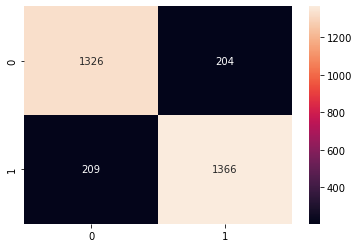

In [250]:
confusion_matrix(y_test,predm1)
sns.heatmap(confusion_matrix(y_test,predm1),annot=True, fmt='d')

# ROCAUC curve

In [251]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.63383479, 0.03378665, 0.92241161, ..., 0.78668417, 0.92822222,
       0.72330691])

In [252]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [253]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.866984126984127


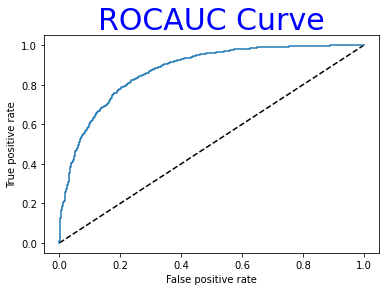

In [254]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

# Model Saving

In [255]:
import joblib                                                                                                     
joblib.dump(final_model,'Customer Churn Analysis Project Model.pkl')

['Customer Churn Analysis Project Model.pkl']